In [73]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

train_data = keras.preprocessing.image_dataset_from_directory(
    "Vehicle Images",
    image_size=(64, 64),
    seed=0,
    validation_split=0.2,
    subset="training"
)
test_data = keras.preprocessing.image_dataset_from_directory(
    "Vehicle Images",
    image_size=(64, 64),
    seed=0,
    validation_split=0.2,
    subset="validation"
)

Found 17760 files belonging to 2 classes.
Using 14208 files for training.
Found 17760 files belonging to 2 classes.
Using 3552 files for validation.


In [81]:
model = keras.Sequential()
model.add(layers.Input(shape=(64, 64, 3)))
model.add(layers.Rescaling(1/255))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (2, 2), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(train_data, epochs=10, batch_size=128, validation_data=test_data)

Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.8710 - loss: 0.2841 - val_accuracy: 0.9806 - val_loss: 0.0603
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 93s 209ms/step - accuracy: 0.9762 - loss: 0.0652 - val_accuracy: 0.9780 - val_loss: 0.0685
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 90s 203ms/step - accuracy: 0.9841 - loss: 0.0403 - val_accuracy: 0.9794 - val_loss: 0.0558
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.9904 - loss: 0.0311 - val_accuracy: 0.9766 - val_loss: 0.0787
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 91s 205ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9730 - val_loss: 0.1044
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.9921 - loss: 0.0230 - val_accuracy: 0.9904 - val_loss: 0.0321
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 94s 212ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9873 - val_loss: 0.0465
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.9946 - loss: 0

In [82]:
model.save("vehicleCNN.keras")

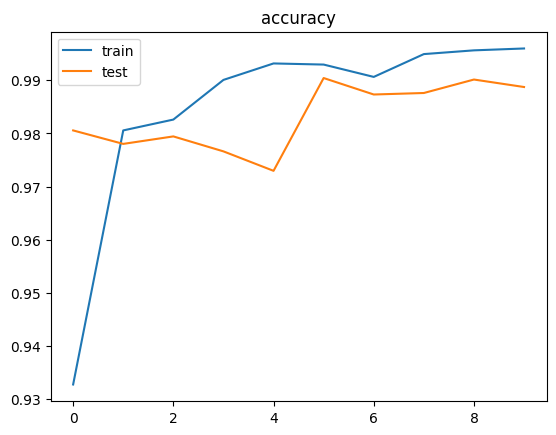

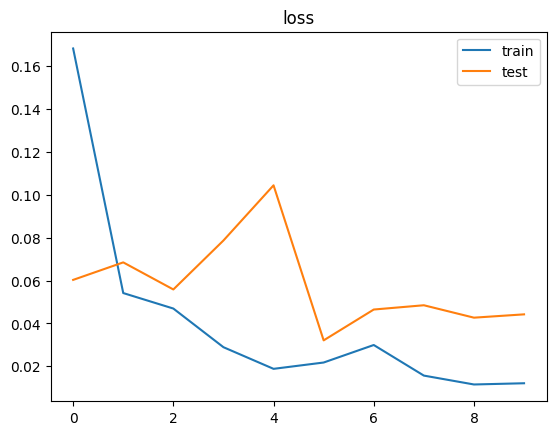

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

history = model.history.history

plt.title("accuracy")
ax = sns.lineplot(history["accuracy"], label="train")
sns.lineplot(history["val_accuracy"], ax=ax, label="test")
plt.show()

plt.title("loss")
ax = sns.lineplot(history["loss"], label="train")
sns.lineplot(history["val_loss"], ax=ax, label="test")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


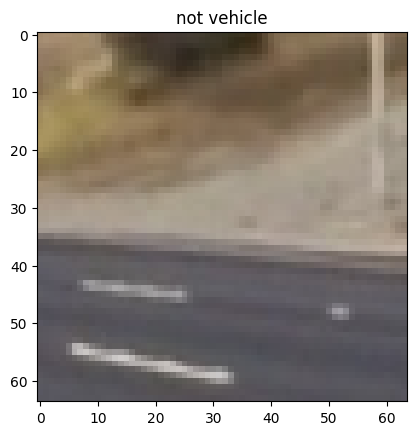

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


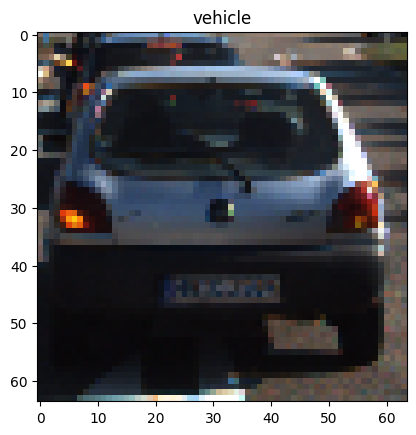

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


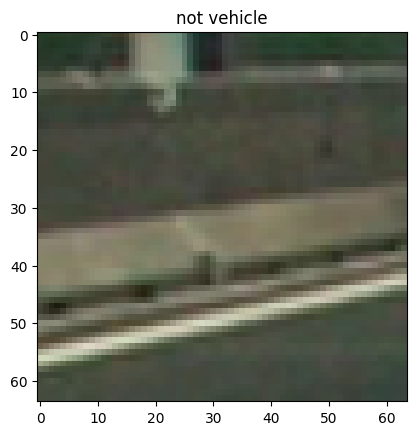

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


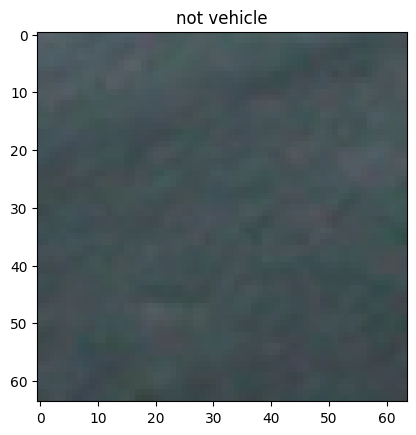

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


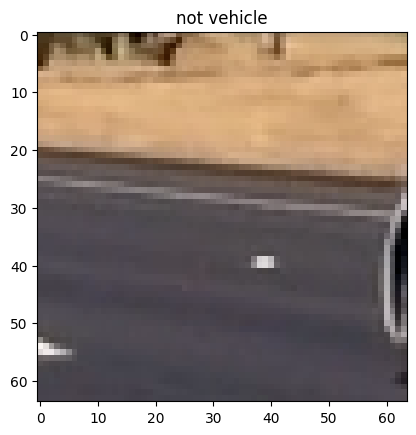

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


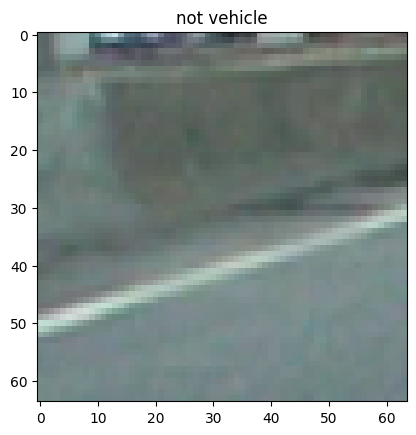

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


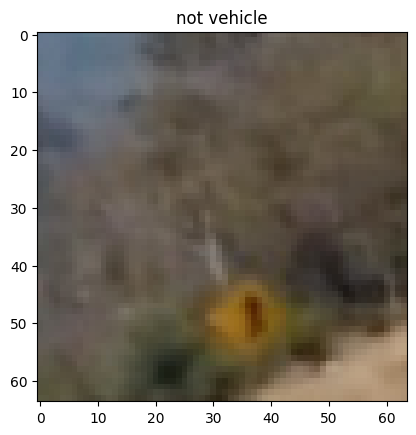

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


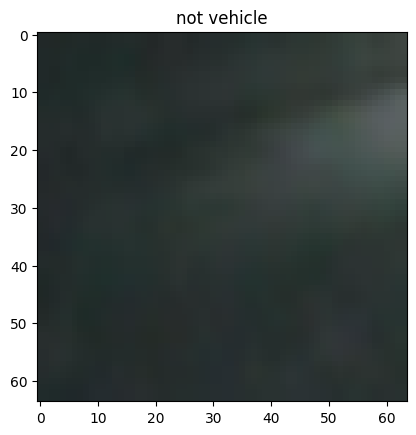

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


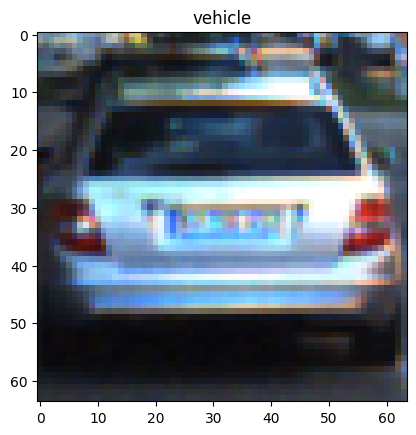

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


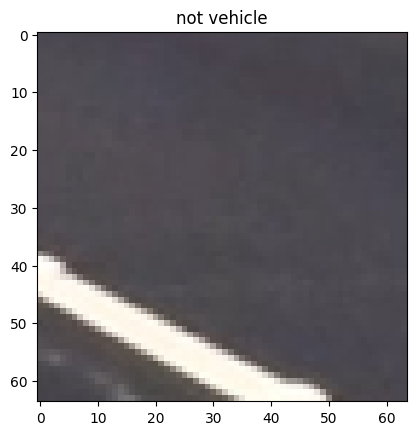

In [85]:
import numpy as np
batch = test_data.as_numpy_iterator().next()[0] # returns tuple of images and labels

for i in range(10):
    image = batch[i]
    #print(image.shape)
    predict = np.round(model.predict(np.expand_dims(image, axis=0) ))
    title = "vehicle" if predict == 1 else "not vehicle"
    plt.title(title)
    plt.imshow(image / 255)
    plt.show()